In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize

In [8]:
portfolio = {
  "portfolio": [

    {"symbol": "NVDA", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "AMD", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "META", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "GOOGL", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "TSLA", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "AMZN", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "MSFT", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "FSLY", "totalValue": 1000, "percentageOfPortfolio": 12.5}
  ]
}

# Extract symbols into a list
symbols = [entry["symbol"] for entry in portfolio["portfolio"]]


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


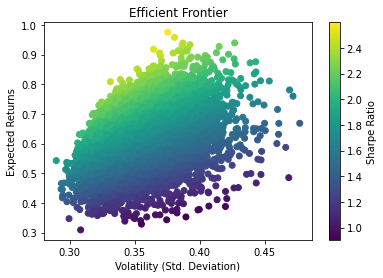

In [9]:
start_date = "2022-10-01"
end_date = "2024-02-22"
price_data = pd.DataFrame()

# Fetch and store the adjusted close prices for each stock in the portfolio
for item in portfolio['portfolio']:
    symbol = item['symbol']
    data = yf.download(symbol, start=start_date, end=end_date)
    price_data[symbol] = data['Adj Close']

# Calculate daily returns
returns = price_data.pct_change().dropna()

# Expected returns and covariance
expected_returns = returns.mean() * 252  # Annualize
cov_matrix = returns.cov() * 252  # Annualize

# Number of portfolios to simulate
num_portfolios = 10000

# Set up arrays to store results
results = np.zeros((3, num_portfolios))  # Adjusted to correctly reflect three outcomes (Ret, Std, Sharpe)

for i in range(num_portfolios):
    weights = np.random.random(len(symbols))
    weights /= np.sum(weights)
    
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    portfolio_sharpe = portfolio_return / portfolio_stddev  # Assuming risk-free rate = 0 for simplicity
    
    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = portfolio_sharpe

# Convert results array to DataFrame
results_frame = pd.DataFrame(results.T, columns=['Ret', 'Std', 'Sharpe'])

# Plotting the Efficient Frontier
plt.scatter(results_frame['Std'], results_frame['Ret'], c=results_frame['Sharpe'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()